**Importing necessary libraries:**

In [1]:
# importing data mining/cleaning/exploratory libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib
import plotly
from sklearn.preprocessing import MinMaxScaler

sns.set(rc={'figure.figsize':(6,5)})

**Dataset Description:**

This data set contains 416 liver patient records and 167 non-liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into the liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

**Columns:**
Age of the patient, Gender of the patient, Total Bilirubin, Direct Bilirubin, Alkaline Phosphotase, Alamine Aminotransferase, Aspartate Aminotransferase, Total Proteins, Albumin, Albumin and Globulin Ratio, Liver Cirrhosis: field used to split the data into two sets (patient with liver Cirrhosis, or no disease)

**Dataset Link:** https://www.kaggle.com/datasets/uciml/indian-liver-patient-records

**Importing dataset:**

In [2]:
# reading in dataset
df = pd.read_csv('/content/Liver Cirrhosis.csv')
display(df.head())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver Cirrhosis
0,65,Female,0.7,0.0,87,6,8,6.8,3.3,0.90,0
1,61,Male,0.9,5.5,699,64,0,7.5,3.1,0.74,0
2,61,Male,7.3,4.0,490,60,68,7.0,3.3,0.89,0
3,58,Male,0.0,0.4,81,4,10,6.8,3.4,0.00,0
4,71,Male,3.9,1.0,95,17,59,7.3,1.4,0.40,0


In [3]:
# getting dataset shape
df.shape

(583, 11)

In [4]:
# getting dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Liver Cirrhosis             583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
# getting dataset description
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver Cirrhosis
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,42.855918,2.200686,0.926758,187.483705,55.710120,82.987993,6.458319,2.730532,0.442712,0.286449
std,18.837426,4.967247,1.890764,189.895891,114.660383,256.215260,1.097934,1.214345,0.351275,0.452490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000,0.000000,0.000000,0.000000
25%,33.000000,0.600000,0.100000,75.500000,11.000000,14.000000,5.800000,1.600000,0.000000,0.000000
50%,45.000000,0.800000,0.300000,105.000000,31.000000,38.000000,6.600000,3.000000,0.500000,0.000000
75%,58.000000,1.400000,0.700000,193.000000,53.000000,61.000000,7.100000,3.800000,0.800000,1.000000
max,90.000000,75.000000,9.700000,1000.000000,1000.000000,4919.000000,9.600000,5.500000,1.800000,1.000000


**Data Cleaning and Visualization:**

<ipython-input-6-7a79ad206e9a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='GnBu', linewidths=.5);


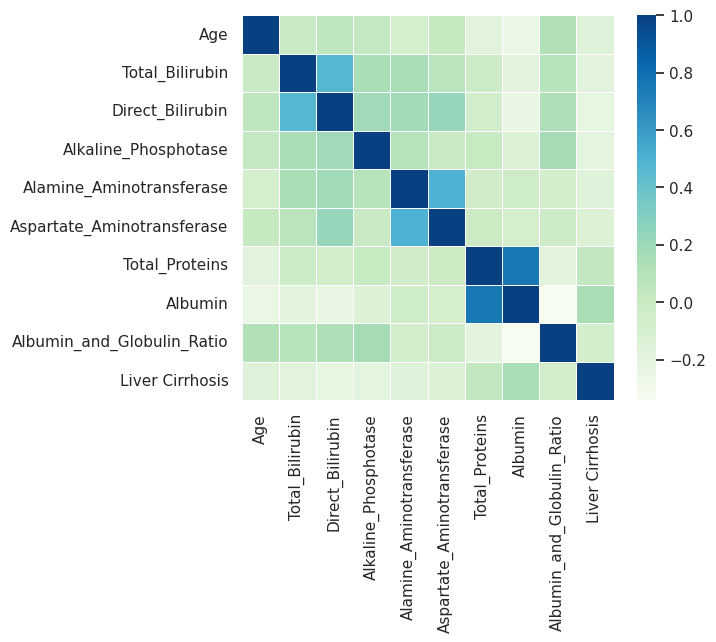

In [6]:
# creating dataset correlation heatmap
sns.heatmap(df.corr(), cmap='GnBu', linewidths=.5);

In [7]:
# retrieving dataset correlations
df.corr()

<ipython-input-7-24b612e1dc00>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver Cirrhosis
Age,1.000000,0.004865,0.054433,0.031181,-0.078894,0.022454,-0.179454,-0.253065,0.122874,-0.149156
Total_Bilirubin,0.004865,1.000000,0.466169,0.153671,0.153652,0.081457,-0.008986,-0.186770,0.090216,-0.175071
Direct_Bilirubin,0.054433,0.466169,1.000000,0.192058,0.183336,0.227762,-0.053807,-0.235095,0.133087,-0.219847
Alkaline_Phosphotase,0.031181,0.153671,0.192058,1.000000,0.088218,0.005941,0.011920,-0.133253,0.174907,-0.204559
Alamine_Aminotransferase,-0.078894,0.153652,0.183336,0.088218,1.000000,0.500467,-0.037541,-0.022047,-0.060525,-0.169216
Aspartate_Aminotransferase,0.022454,0.081457,0.227762,0.005941,0.500467,1.000000,-0.006463,-0.070245,-0.008366,-0.133281
Total_Proteins,-0.179454,-0.008986,-0.053807,0.011920,-0.037541,-0.006463,1.000000,0.757152,-0.185506,0.035487
Albumin,-0.253065,-0.186770,-0.235095,-0.133253,-0.022047,-0.070245,0.757152,1.000000,-0.342642,0.152288
Albumin_and_Globulin_Ratio,0.122874,0.090216,0.133087,0.174907,-0.060525,-0.008366,-0.185506,-0.342642,1.000000,-0.063309
Liver Cirrhosis,-0.149156,-0.175071,-0.219847,-0.204559,-0.169216,-0.133281,0.035487,0.152288,-0.063309,1.000000


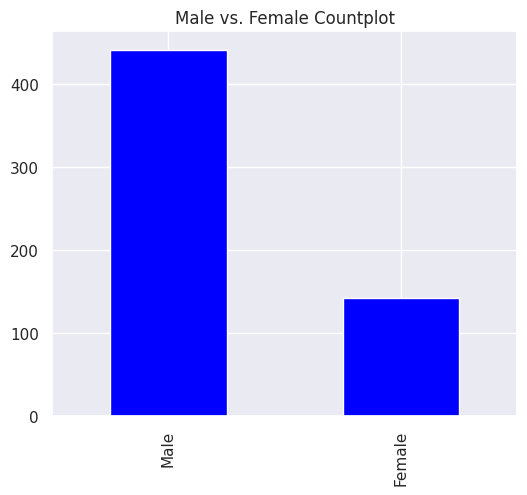

In [8]:
# gender countplot
df['Gender'].value_counts().plot.bar(color='blue', title='Male vs. Female Countplot');

In [9]:
# value counts for gender column
df['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [10]:
# percent of the people tested that were male
male_count = (df['Gender'] == 'Male').sum()
female_count = (df['Gender'] == 'Female').sum()

percent_male = (male_count / (male_count+female_count)) * 100
percent_female = (female_count / (female_count+male_count)) * 100

print('{:.2f}% of the people tested are male'.format(percent_male))
print('{:.2f}% of the people tested are female'.format(percent_female))

75.64% of the people tested are male
24.36% of the people tested are female


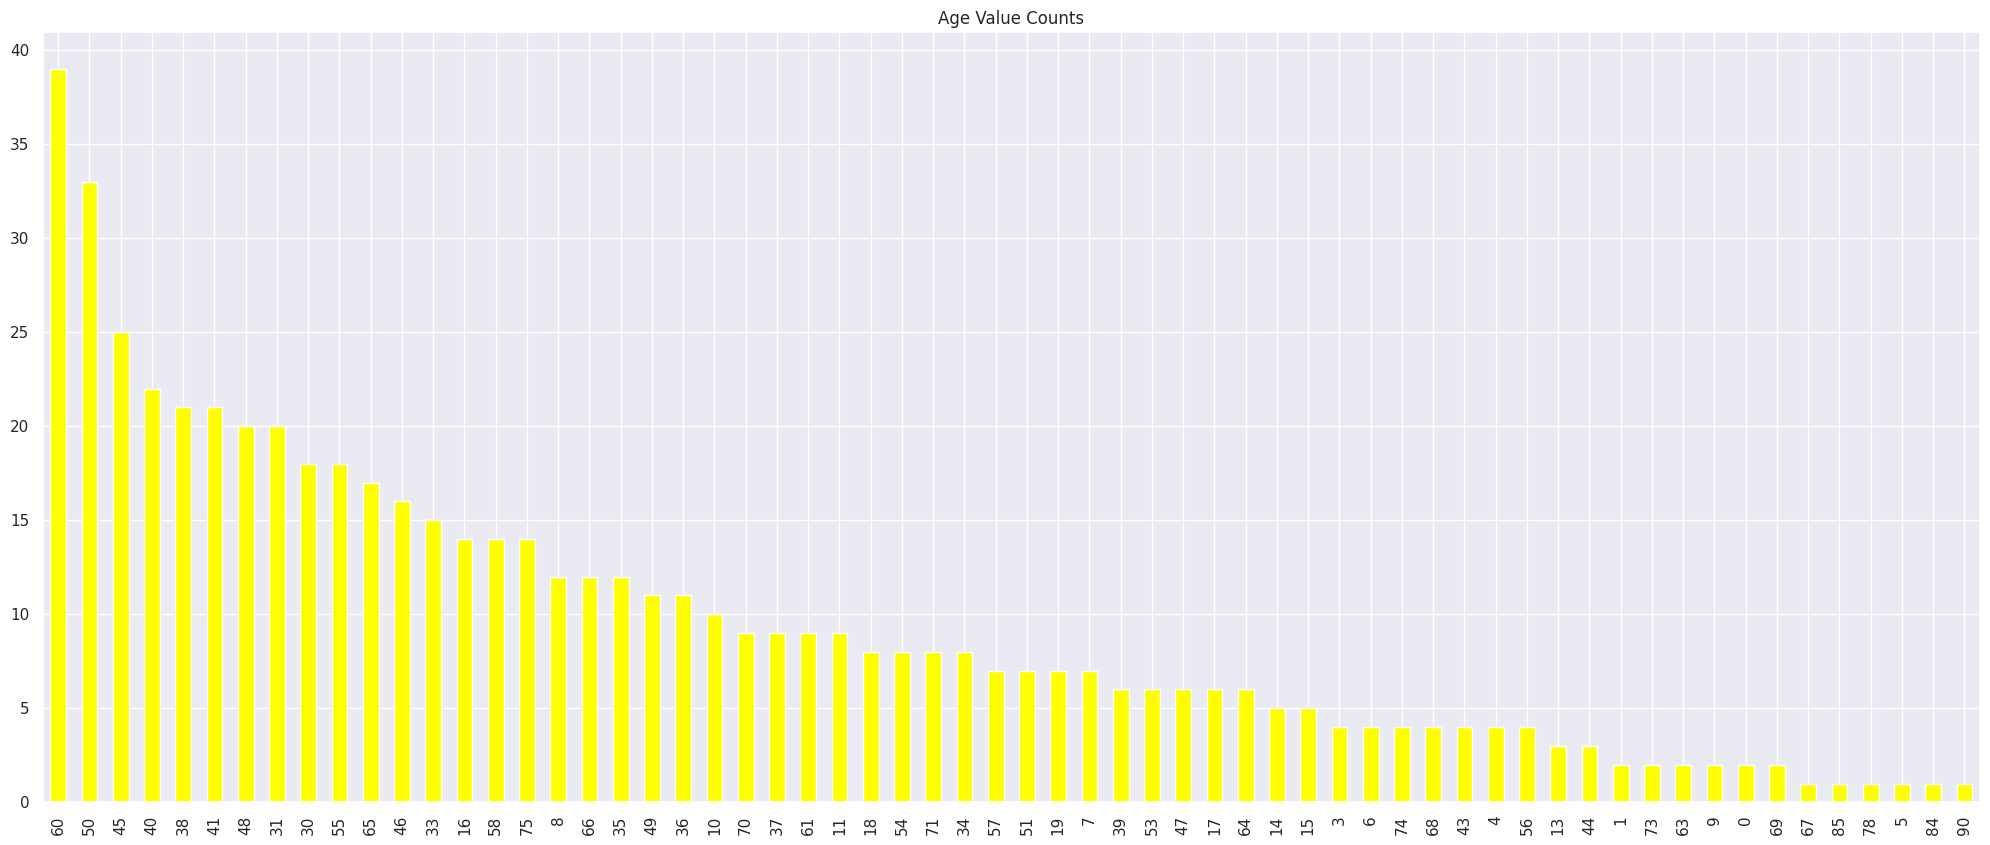

In [11]:
# age value counts
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
df['Age'].value_counts().plot.bar(color='yellow', title='Age Value Counts');

In [12]:
# value counts for age column
df['Age'].value_counts()

60    39
50    33
45    25
40    22
38    21
      ..
85     1
78     1
5      1
84     1
90     1
Name: Age, Length: 62, dtype: int64

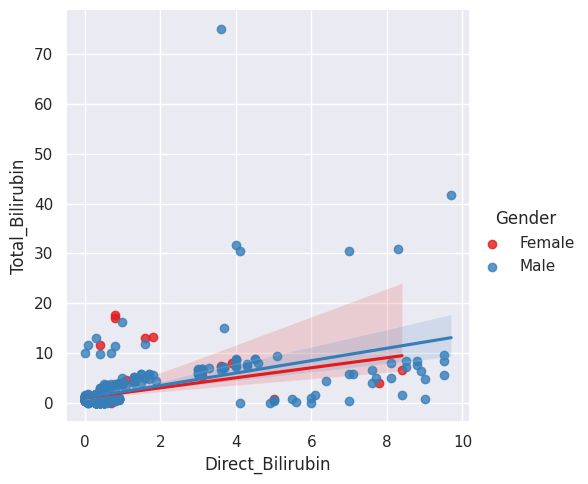

In [13]:
# lmplots of direct bilirubin vs. total bilirubin in terms of gender
sns.set()
g = sns.lmplot(x="Direct_Bilirubin", y="Total_Bilirubin", hue="Gender", height=5, data=df,  palette="Set1")
g.set_axis_labels("Direct_Bilirubin", "Total_Bilirubin");

In [14]:
# correlation direct bilirubin vs. total bilirubin
df['Direct_Bilirubin'].corr(df['Total_Bilirubin'])

0.46616944105820524

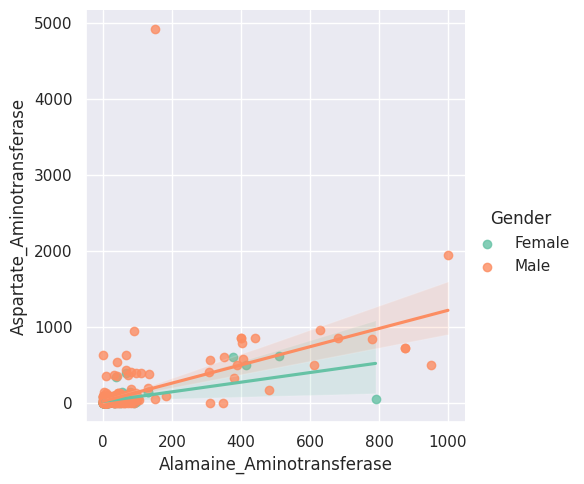

In [15]:
# lmplot of alamine aminotransferase vs. aspartate aminotransferase in terms of gender
sns.set()
g = sns.lmplot(x="Alamine_Aminotransferase", y="Aspartate_Aminotransferase", hue='Gender', height=5, data=df,  palette="Set2")
g.set_axis_labels("Alamaine_Aminotransferase", "Aspartate_Aminotransferase");

In [16]:
# correlation alamine aminotransferase vs. aspartate aminotransferace
df['Alamine_Aminotransferase'].corr(df['Aspartate_Aminotransferase'])

0.500466882165842

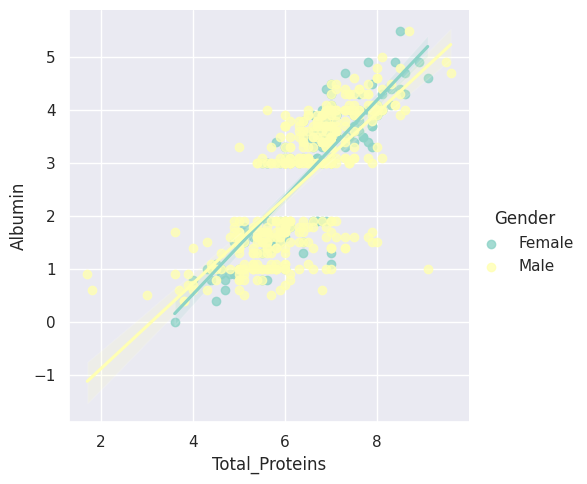

In [17]:
# lmplot of total proteins vs. albumin in terms of gender
sns.set()
g = sns.lmplot(x="Total_Proteins", y="Albumin", hue='Gender', height=5, data=df,  palette="Set3")
g.set_axis_labels("Total_Proteins", "Albumin");

In [18]:
# correlation total proteins vs. albumin
df['Total_Proteins'].corr(df['Albumin'])

0.7571516223516619

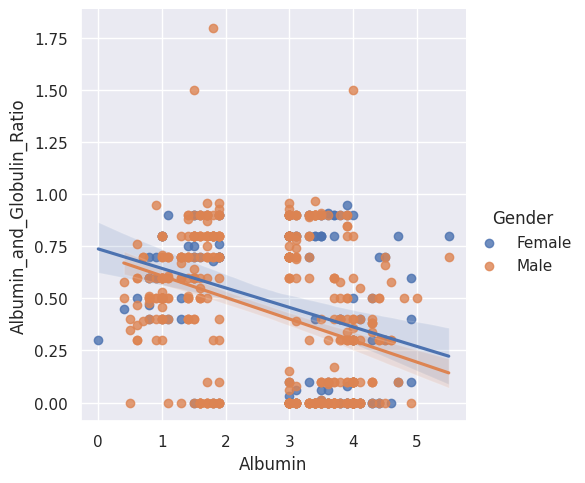

In [19]:
# lmplot of albumin vs. albumin and globulin ratio in terms gender
sns.set()
g = sns.lmplot(x="Albumin", y="Albumin_and_Globulin_Ratio", hue='Gender', height=5, data=df)
g.set_axis_labels("Albumin", "Albumin_and_Globulin_Ratio");

In [20]:
# correlation albumin vs. albumin and globulin ratio
df['Albumin'].corr(df['Albumin_and_Globulin_Ratio'])

-0.34264169704032893

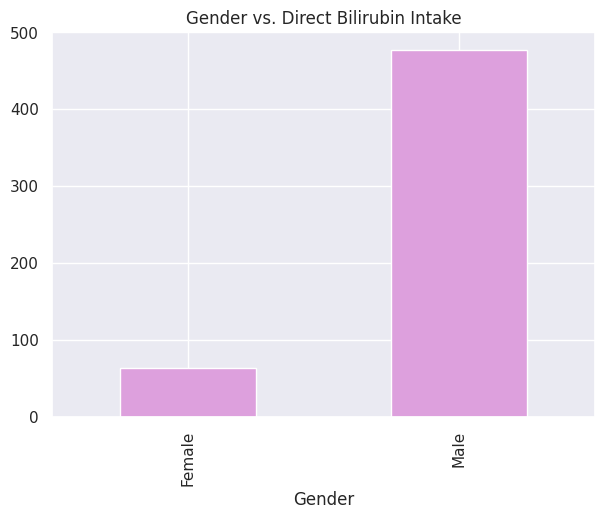

In [21]:
# direct bilirubin sum in terms of gender
plt.figure(figsize=(7,5))
df.groupby('Gender').sum()['Direct_Bilirubin'].plot.bar(color='plum', title='Gender vs. Direct Bilirubin Intake');

In [22]:
# sums for direct bilurubin in terms of gender
df.groupby('Gender')['Direct_Bilirubin'].sum()

Gender
Female     63.9
Male      476.4
Name: Direct_Bilirubin, dtype: float64

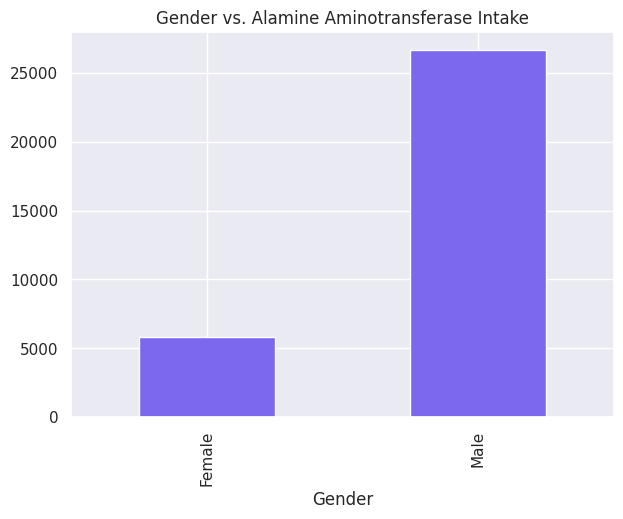

In [23]:
# total bilirubin sum in terms of gender
plt.figure(figsize=(7,5))
df.groupby('Gender').sum()['Alamine_Aminotransferase'].plot.bar(color='mediumslateblue', title='Gender vs. Alamine Aminotransferase Intake');

In [24]:
# sums for alamine aminotransferase in terms of gender
df.groupby('Gender')['Alamine_Aminotransferase'].sum()

Gender
Female     5826
Male      26653
Name: Alamine_Aminotransferase, dtype: int64

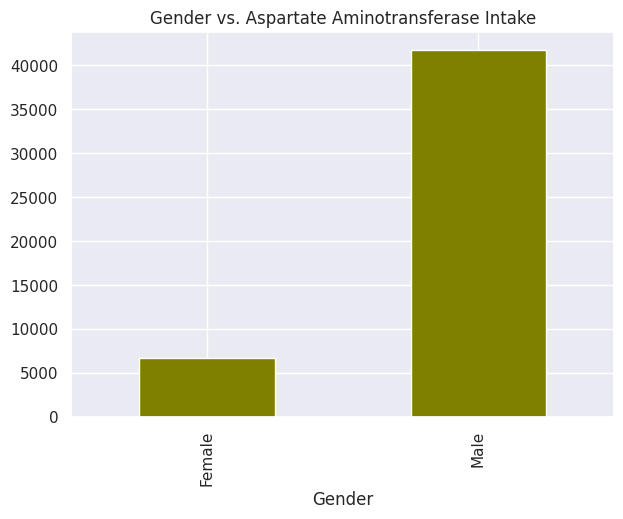

In [25]:
# aspartate aminotransferase sum in terms of gender
plt.figure(figsize=(7,5))
df.groupby('Gender').sum()['Aspartate_Aminotransferase'].plot.bar(color='olive', title='Gender vs. Aspartate Aminotransferase Intake');

In [26]:
# sums for aspartate aminotransferase in terms of gender
df.groupby('Gender')['Aspartate_Aminotransferase'].sum()

Gender
Female     6652
Male      41730
Name: Aspartate_Aminotransferase, dtype: int64

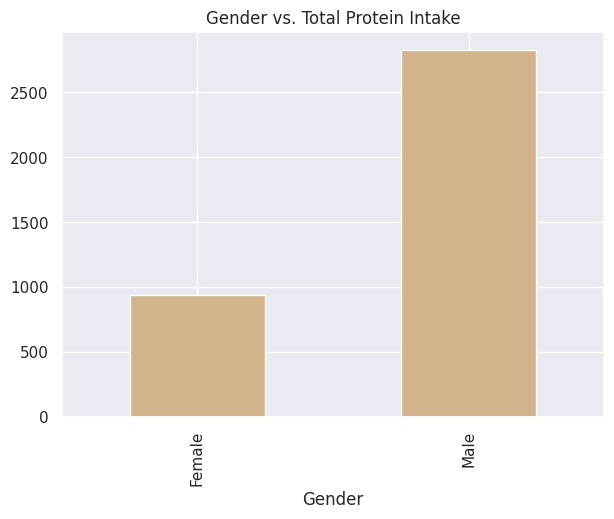

In [27]:
# total proteins sum in terms of gender
plt.figure(figsize=(7,5))
df.groupby('Gender').sum()['Total_Proteins'].plot.bar(color='tan', title='Gender vs. Total Protein Intake');

In [28]:
# sums for total proteins in terms of gender
df.groupby('Gender')['Total_Proteins'].sum()

Gender
Female     941.8
Male      2823.4
Name: Total_Proteins, dtype: float64

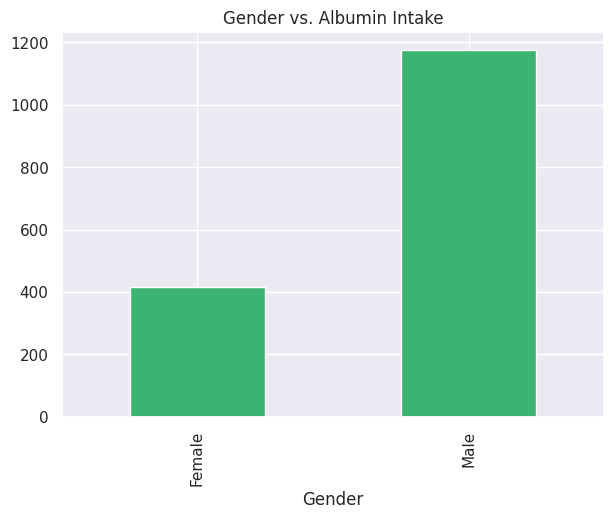

In [29]:
# albumin sum in terms of gender
plt.figure(figsize=(7,5))
df.groupby('Gender').sum()['Albumin'].plot.bar(color='mediumseagreen', title='Gender vs. Albumin Intake');

In [30]:
# sums for albumin in terms of gender
df.groupby('Gender')['Albumin'].sum()

Gender
Female     417.2
Male      1174.7
Name: Albumin, dtype: float64

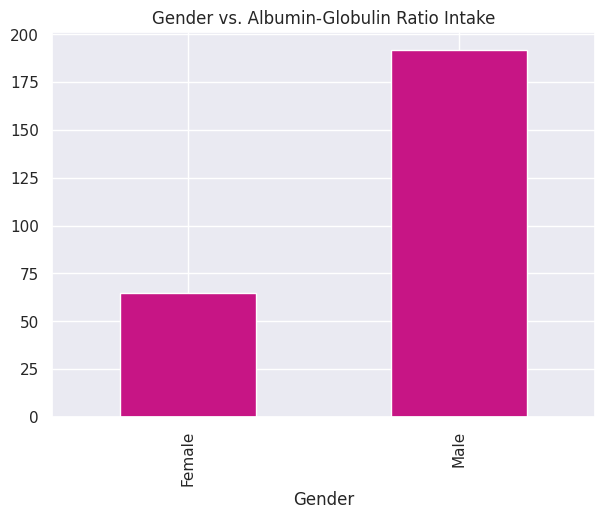

In [31]:
# albumin and globulin ratio sum in terms of gender
plt.figure(figsize=(7,5))
df.groupby('Gender').sum()['Albumin_and_Globulin_Ratio'].plot.bar(color='mediumvioletred', title='Gender vs. Albumin-Globulin Ratio Intake');

In [32]:
# sums for albumin and globulin ratio in terms of gender
df.groupby('Gender')['Albumin_and_Globulin_Ratio'].sum()

Gender
Female     64.72
Male      191.61
Name: Albumin_and_Globulin_Ratio, dtype: float64

**Dealing with Target Column:**

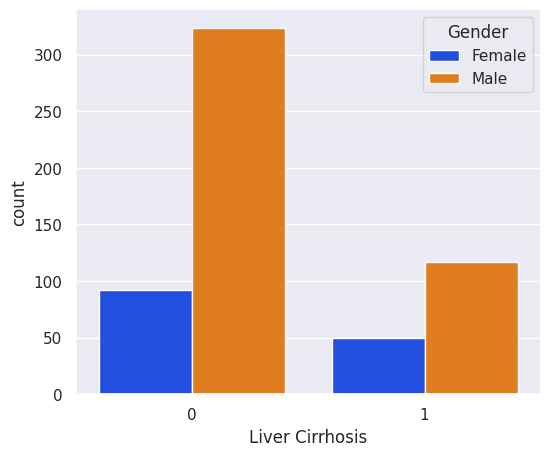

In [33]:
# countplot of liver disease in terms of gender
sns.set(style='darkgrid')
g = sns.countplot(x='Liver Cirrhosis', hue='Gender', data=df, palette='bright');

In [34]:
# counts for liver disease in terms of gender
df.groupby('Liver Cirrhosis')['Gender'].value_counts()

Liver Cirrhosis  Gender
0                Male      324
                 Female     92
1                Male      117
                 Female     50
Name: Gender, dtype: int64

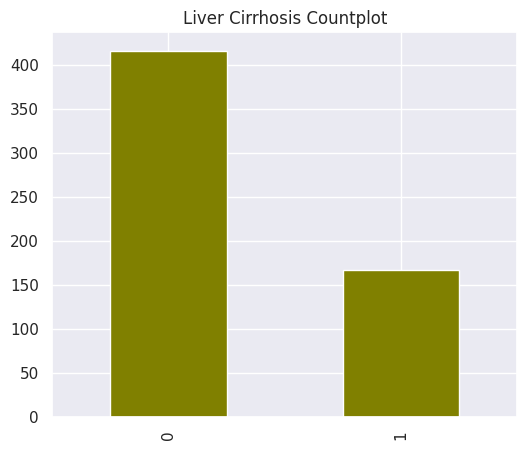

In [35]:
# liver disease value counts
df['Liver Cirrhosis'].value_counts().plot.bar(color='olive', title='Liver Cirrhosis Countplot');

In [36]:
# liver Cirrhosis value counts
df['Liver Cirrhosis'].value_counts()

0    416
1    167
Name: Liver Cirrhosis, dtype: int64

In [37]:
# percentage of people affected with liver cirrhosis
no_disease = (df['Liver Cirrhosis'] == 0).sum()
yes_disease = (df['Liver Cirrhosis'] == 1).sum()
percent_disease = (yes_disease/no_disease * 100)
print('Percentage of people that tested positive for liver cirrhosis is {:.2f}%'.format(percent_disease))

Percentage of people that tested positive for liver cirrhosis is 40.14%


In [38]:
# percentage of people that tested positive for liver cirrhosis that were male
males_percent_disease = (117/yes_disease) * 100
females_percent_disease = (324/yes_disease) * 100
print('Percentage of people that tested positive for liver cirrhosis that are male {:.2f}%'.format(males_percent_disease))
print('Percentage of people that tested positive for liver cirrhosis that are female {:.2f}%'.format(females_percent_disease))

Percentage of people that tested positive for liver cirrhosis that are male 70.06%
Percentage of people that tested positive for liver cirrhosis that are female 194.01%


**Dealing with NULL values:**

In [39]:
# retrieving dataset null value sum
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver Cirrhosis               0
dtype: int64

In [40]:
# retrieving albumin and globulin ratio unique values
df['Albumin_and_Globulin_Ratio'].unique()

array([0.9 , 0.74, 0.89, 0.  , 0.4 , 0.3 , 0.1 , 0.8 , 0.6 , 0.87, 0.7 ,
       0.91, 0.55, 0.5 , 0.85, 0.95, 0.08, 0.34, 0.39, 0.58, 0.15, 0.78,
       0.76, 0.61, 0.67, 0.75, 0.06, 0.66, 0.96, 0.38, 0.51, 0.47, 0.93,
       0.48, 0.69, 0.17, 0.01, 0.53, 0.03, 0.68,  nan, 0.97, 0.35, 0.64,
       0.45, 0.36, 0.88, 0.09, 0.71, 1.8 , 0.46, 1.5 , 0.37])

In [41]:
# retrieving albumin and globulin ratio median value
df['Albumin_and_Globulin_Ratio'].median()

0.5

In [42]:
# replacing na values from albumin and globulin ratio column with median
df.fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)

In [43]:
# retrieving null sum
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Liver Cirrhosis               0
dtype: int64

In [44]:
# making dataframe copy
df1 = df.copy()

In [45]:
# retrieving df1 dataframe info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Liver Cirrhosis             583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


**Outliers:**

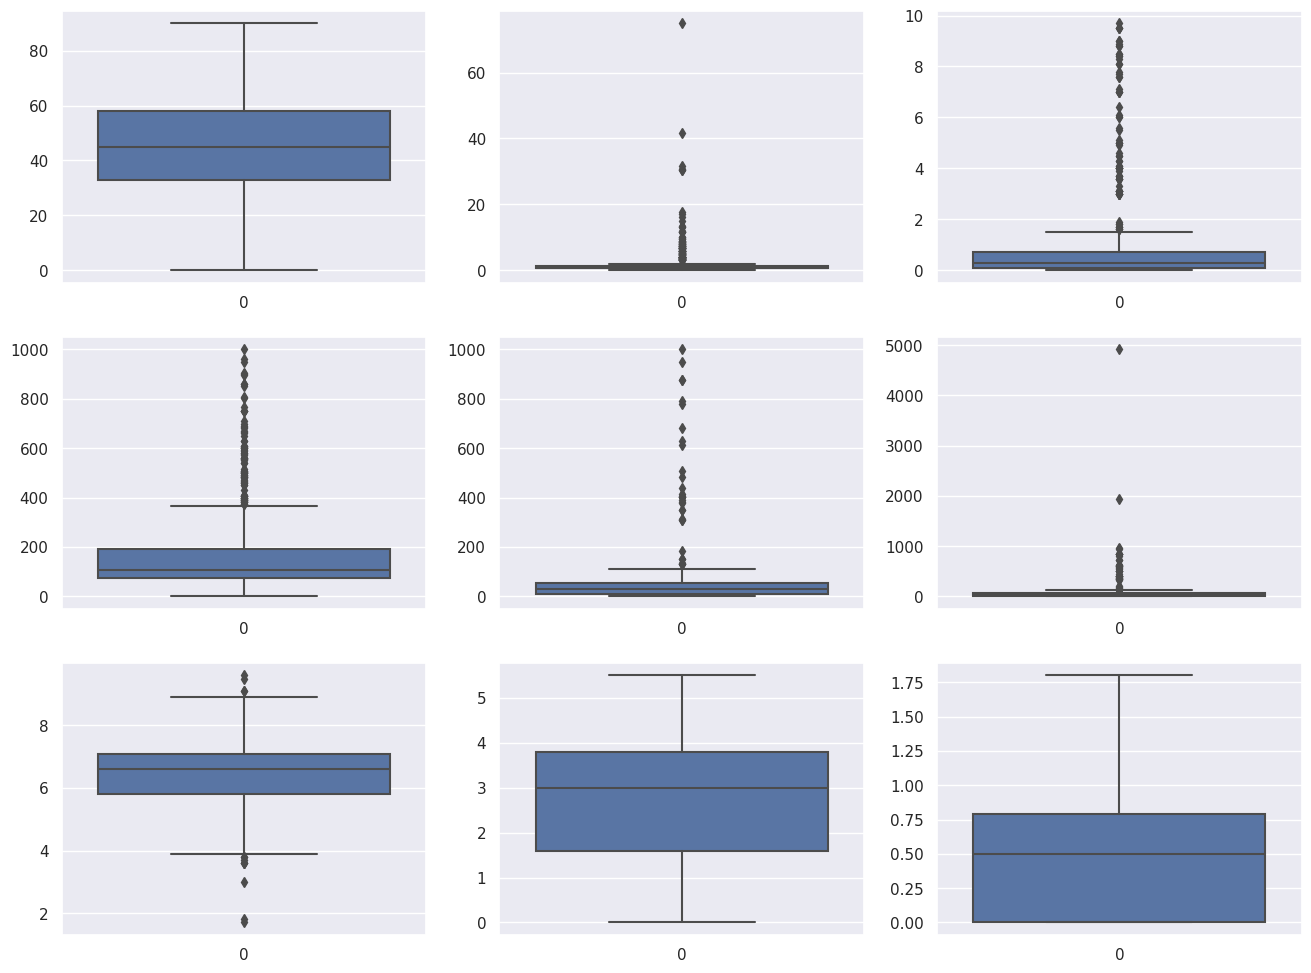

In [46]:
# creating boxplots for features
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df1.Age)
plt.subplot(332)
sns.boxplot(df1.Total_Bilirubin)
plt.subplot(333)
sns.boxplot(df1.Direct_Bilirubin)
plt.subplot(334)
sns.boxplot(df1.Alkaline_Phosphotase)
plt.subplot(335)
sns.boxplot(df1.Alamine_Aminotransferase)
plt.subplot(336)
sns.boxplot(df1.Aspartate_Aminotransferase)
plt.subplot(337)
sns.boxplot(df1.Total_Proteins)
plt.subplot(338)
sns.boxplot(df1.Albumin)
plt.subplot(339)
sns.boxplot(df1.Albumin_and_Globulin_Ratio);

In [47]:
# removing outliers from certain features and printing len after outliers have been removed
print('Original dataset:',len(df1))
df1 = df1[df1.Total_Bilirubin < 40]
df1 = df1[df1.Direct_Bilirubin < 15.0]
df1 = df1[df1.Alkaline_Phosphotase < 1250]
df1 = df1[df1.Alamine_Aminotransferase < 1000]
df1 = df1[df1.Aspartate_Aminotransferase < 2000]
df1 = df1[df1.Albumin_and_Globulin_Ratio < 2.0]
print('After removing outliers:',len(df1))

Original dataset: 583
After removing outliers: 579


In [48]:
# new dataframe shape
df1.shape

(579, 11)

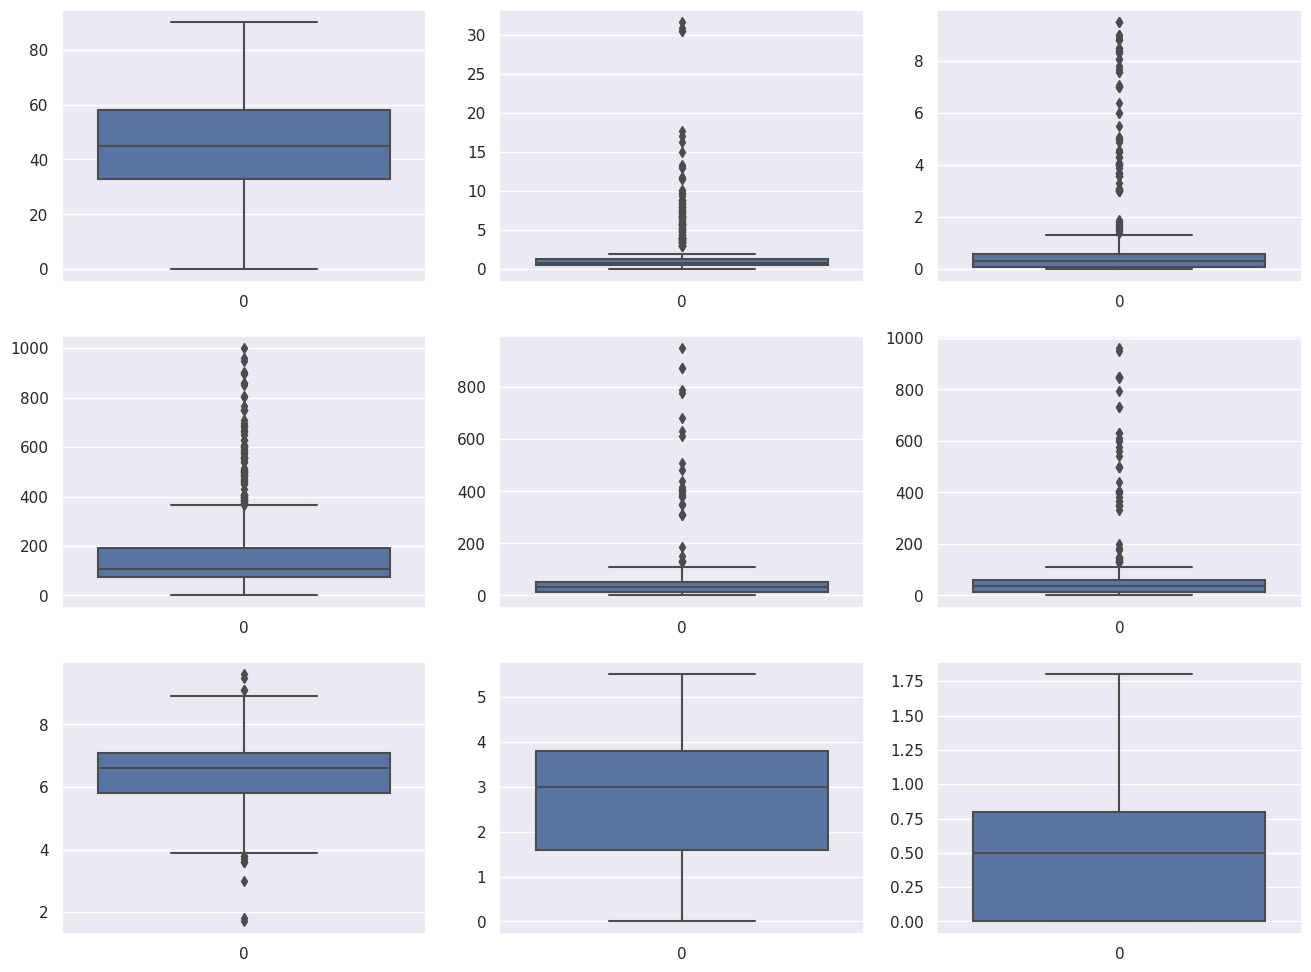

In [49]:
(560, 11)
# creating boxplots after removal of outliers
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df1.Age)
plt.subplot(332)
sns.boxplot(df1.Total_Bilirubin)
plt.subplot(333)
sns.boxplot(df1.Direct_Bilirubin)
plt.subplot(334)
sns.boxplot(df1.Alkaline_Phosphotase)
plt.subplot(335)
sns.boxplot(df1.Alamine_Aminotransferase)
plt.subplot(336)
sns.boxplot(df1.Aspartate_Aminotransferase)
plt.subplot(337)
sns.boxplot(df1.Total_Proteins)
plt.subplot(338)
sns.boxplot(df1.Albumin)
plt.subplot(339)
sns.boxplot(df1.Albumin_and_Globulin_Ratio);

In [50]:
# shapes of dataframes
print(df.shape)
print(df1.shape)

(583, 11)
(579, 11)


**Log-transformation and min-max scaling:**

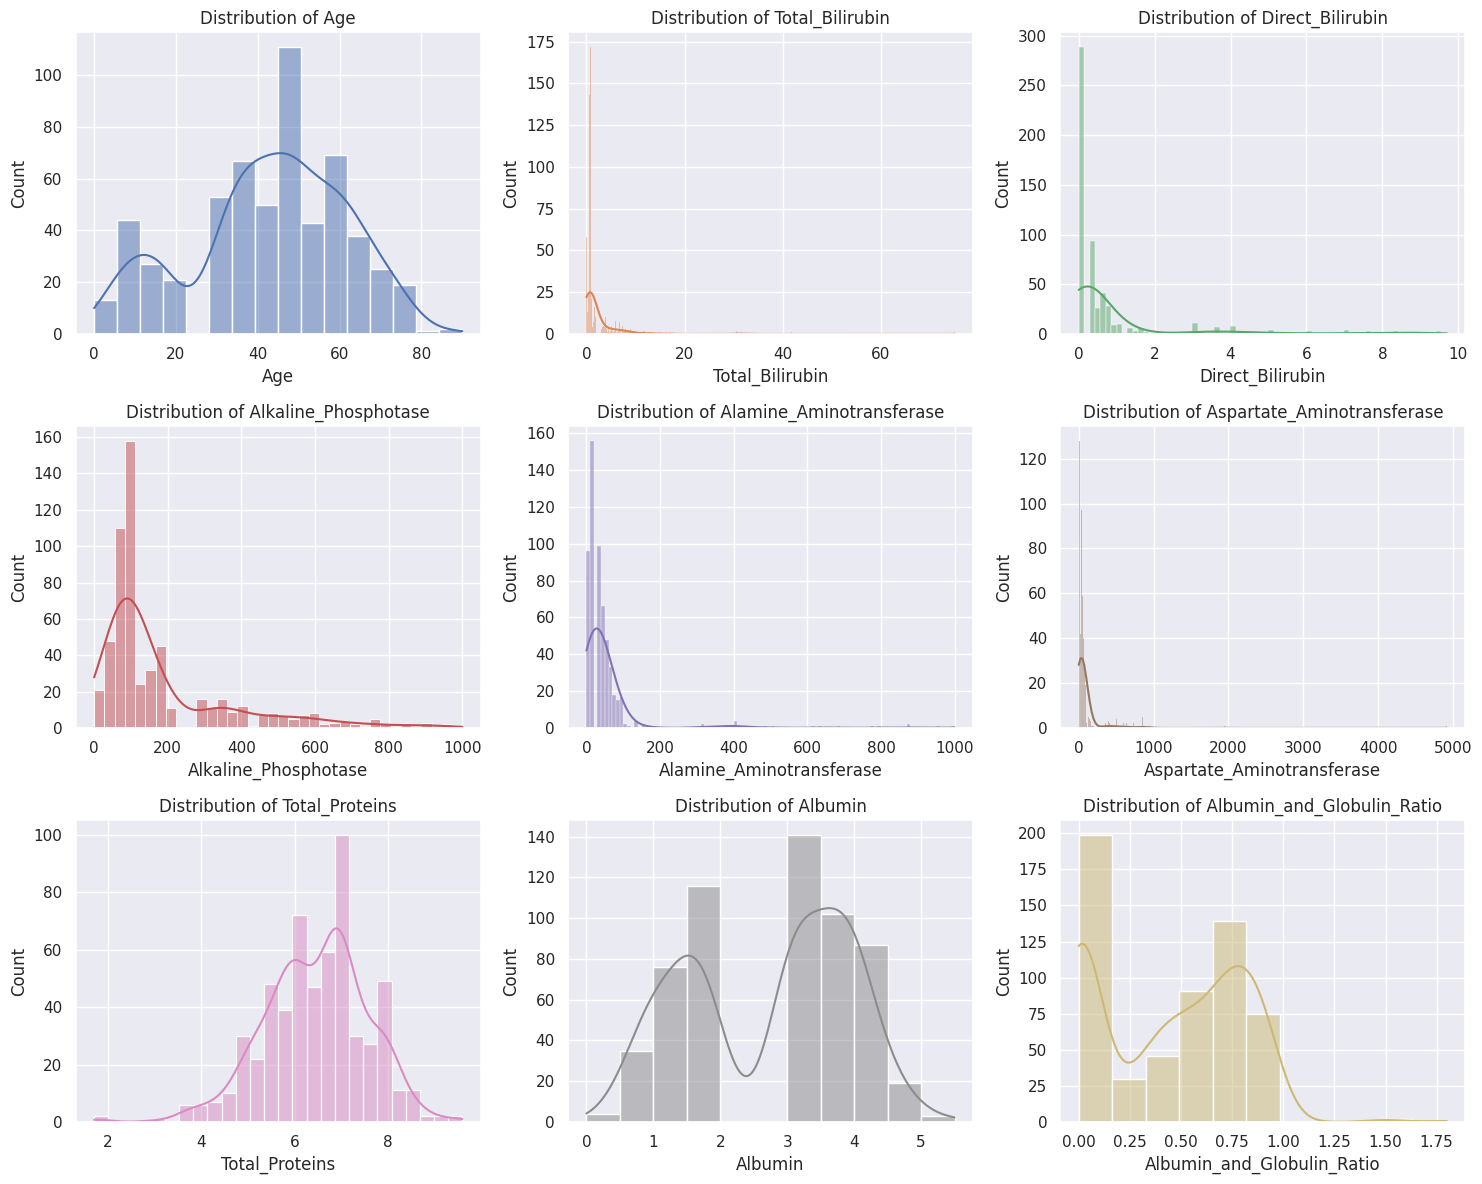

In [51]:
# Columns for which you want to create distribution plots
columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin', 'Albumin_and_Globulin_Ratio']

# Number of columns in each row of subplots
num_cols = 3

# Calculate the number of rows needed
num_rows = len(columns) // num_cols
if len(columns) % num_cols > 0:
    num_rows += 1

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Flatten the axes to simplify indexing
axes = axes.ravel()

# Loop through the columns and create distribution plots in subplots
for i, column in enumerate(columns):
    sns.histplot(df[column], kde=True, color="C{}".format(i), ax=axes[i])
    axes[i].set_title('Distribution of ' + column)

# Remove any empty subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

<ipython-input-52-ea30bd15da57>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column], kde=True, label=column)
<ipython-input-52-ea30bd15da57>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column], kde=True, label=column)
<ipython-input-52-ea30bd15da57>:10: UserWarning: 

`distpl

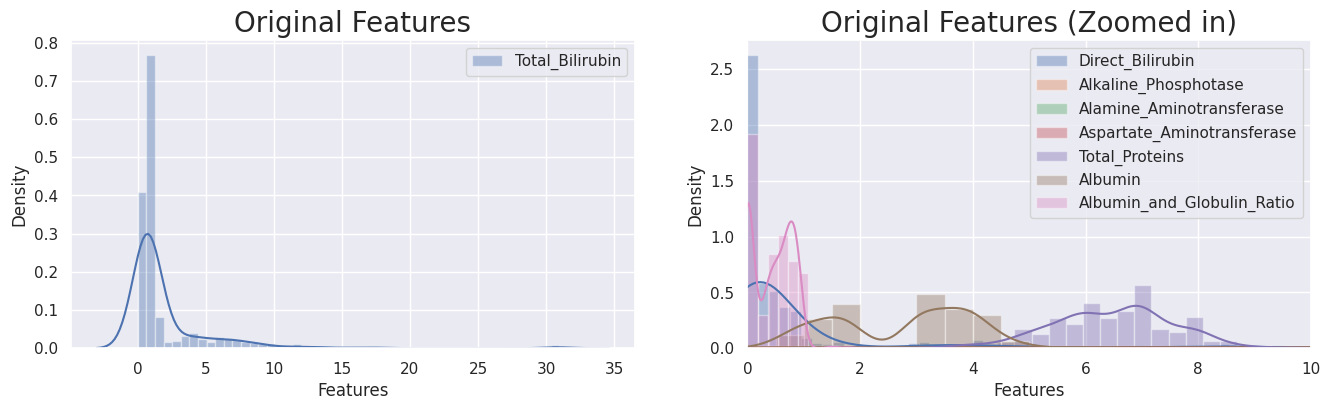

In [52]:
# List of columns to create distplots for
columns = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin', 'Albumin_and_Globulin_Ratio']

# Create a figure with subplots
plt.figure(figsize=(16, 4))

# Create a distplot for each column
for i, column in enumerate(columns):
    plt.subplot(121) if i == 0 else plt.subplot(122)
    sns.distplot(df1[column], kde=True, label=column)

# Set the titles and labels
plt.subplot(121)
plt.title('Original Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()

plt.subplot(122)
plt.title('Original Features (Zoomed in)', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.xlim(0, 10)
plt.legend()

# Show the plots
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


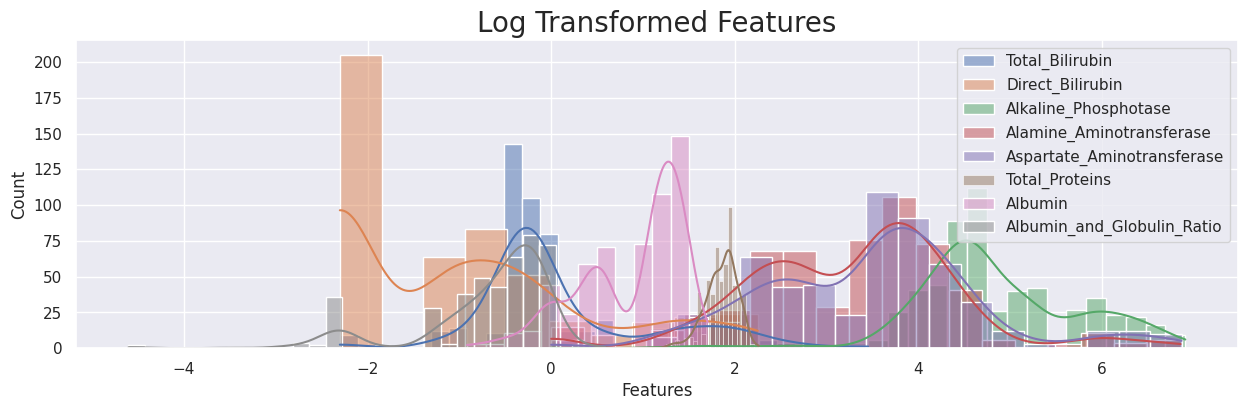

In [53]:
# creating log transformation of all features
# List of columns to create log transformations and distplots for
columns = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin', 'Albumin_and_Globulin_Ratio']

# Create log transformations for each column
log_transformed_columns = [np.log(df1[column]) for column in columns]

# Create a figure for distplots
plt.figure(figsize=(15, 4))

# Create distplots for log-transformed features
for i, column in enumerate(columns):
    sns.histplot(log_transformed_columns[i], kde=True, label=column)

plt.title('Log Transformed Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

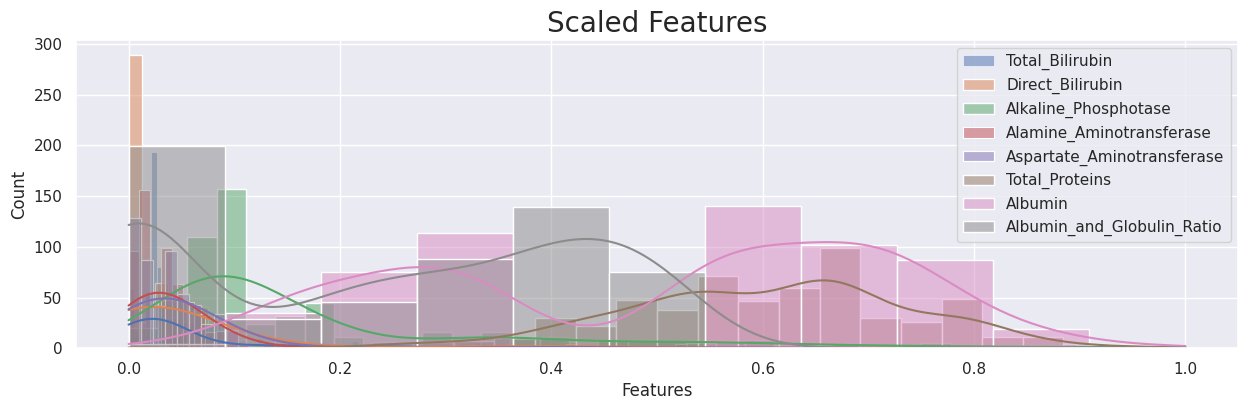

In [54]:
# min-max scaling by-hand all the features
# List of columns to scale
columns = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin', 'Albumin_and_Globulin_Ratio']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df1[columns] = scaler.fit_transform(df1[columns])

# Create a figure for distplots
plt.figure(figsize=(15, 4))

# Create distplots for the scaled features
for i, column in enumerate(columns):
    sns.histplot(df1[column], kde=True, label=column)

plt.title('Scaled Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

**Binning of age column:**

In [55]:
# retrieving age unique values
unique = df1['Age'].unique()

# retrieving max unique value for age
unique_max = df1['Age'].unique().max()

print('Unique Age Values : ',unique)
print('Unique Maximum Age Value : ',unique_max)

Unique Age Values :  [65 61 58 71 46 16 19  7 55 57 64 74 60 15 38 33 40 50 63 34 10 84 51 30
 48 47 45 41 85 35 31 54 37 66  9 75 68 70 49  4  3  8 39 17 36 14 18 53
  5 56 44 11  6 43 13  1 69 78  0 73 67 90]
Unique Maximum Age Value :  90


In [56]:
# binning age column and replacing values in terms of age group 1 = youth, 2 = adult, and 3 = elderly
# youth = 0-23, adult = 24-63, elderly = 64-99
# max age was 90
df1['Age'] = pd.cut(df1['Age'], bins=[0,24,64,100], labels=['Youth','Adult','Elderly'])

In [57]:
# retrieving age value counts
df1['Age'].value_counts()

Adult      399
Youth      102
Elderly     76
Name: Age, dtype: int64

In [58]:
# percent of people tested that are adults
adult_count = (df1['Age'] == 2).sum()
total_count = len(df1['Age'])

percent_adults = (adult_count/total_count)*100

print('From all the people that were tested, {:.2f}% are adults'.format(percent_adults))

From all the people that were tested, 0.00% are adults


In [59]:
# retrieving dataframe shape
df1.shape

(579, 11)

In [60]:
# value counts of liver disease in terms of age group
df1.groupby('Liver Cirrhosis')['Age'].value_counts()

Liver Cirrhosis  Age    
0                Adult      298
                 Elderly     58
                 Youth       55
1                Adult      101
                 Youth       47
                 Elderly     18
Name: Age, dtype: int64

In [61]:
print('Percent of people with liver disease that are in the adult age group of 24-63 years of age is {:.2f}%'
      .format((117/(117+31+18)) *100))

Percent of people with liver disease that are in the adult age group of 24-63 years of age is 70.48%


**One-hot encoding:**

In [62]:
# creating dummies for dataset
df1 = pd.get_dummies(df1)

In [63]:
# retrieving shape of dataset
df1.shape

(579, 14)

In [64]:
# retrieving dataframe column list
df1.columns.tolist()

['Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Proteins',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Liver Cirrhosis',
 'Age_Youth',
 'Age_Adult',
 'Age_Elderly',
 'Gender_Female',
 'Gender_Male']

**Dataset Stability Check:**

In [65]:
# dataframe iloc
df1.iloc[0]

Total_Bilirubin               0.022152
Direct_Bilirubin              0.000000
Alkaline_Phosphotase          0.087000
Alamine_Aminotransferase      0.006316
Aspartate_Aminotransferase    0.008333
Total_Proteins                0.645570
Albumin                       0.600000
Albumin_and_Globulin_Ratio    0.500000
Liver Cirrhosis               0.000000
Age_Youth                     0.000000
Age_Adult                     0.000000
Age_Elderly                   1.000000
Gender_Female                 1.000000
Gender_Male                   0.000000
Name: 0, dtype: float64

In [66]:
# dataframe iloc
df1.iloc[-1]

Total_Bilirubin               0.000000
Direct_Bilirubin              0.031579
Alkaline_Phosphotase          0.106000
Alamine_Aminotransferase      0.010526
Aspartate_Aminotransferase    0.014583
Total_Proteins                0.708861
Albumin                       0.800000
Albumin_and_Globulin_Ratio    0.277778
Liver Cirrhosis               1.000000
Age_Youth                     0.000000
Age_Adult                     1.000000
Age_Elderly                   0.000000
Gender_Female                 0.000000
Gender_Male                   1.000000
Name: 582, dtype: float64

In [67]:
# retrieving dataframe information
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total_Bilirubin             579 non-null    float64
 1   Direct_Bilirubin            579 non-null    float64
 2   Alkaline_Phosphotase        579 non-null    float64
 3   Alamine_Aminotransferase    579 non-null    float64
 4   Aspartate_Aminotransferase  579 non-null    float64
 5   Total_Proteins              579 non-null    float64
 6   Albumin                     579 non-null    float64
 7   Albumin_and_Globulin_Ratio  579 non-null    float64
 8   Liver Cirrhosis             579 non-null    int64  
 9   Age_Youth                   579 non-null    uint8  
 10  Age_Adult                   579 non-null    uint8  
 11  Age_Elderly                 579 non-null    uint8  
 12  Gender_Female               579 non-null    uint8  
 13  Gender_Male                 579 non

In [68]:
# retrieving dataframe description
df1.describe()

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver Cirrhosis,Age_Youth,Age_Adult,Age_Elderly,Gender_Female,Gender_Male
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,0.063630,0.093682,0.187371,0.056748,0.074505,0.602217,0.497441,0.246047,0.288428,0.176166,0.689119,0.131261,0.245250,0.754750
std,0.113745,0.193202,0.190072,0.113741,0.145454,0.139252,0.220919,0.195100,0.453423,0.381291,0.463254,0.337977,0.430608,0.430608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.018987,0.010526,0.075500,0.011579,0.014583,0.518987,0.290909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.025316,0.031579,0.105000,0.032632,0.039583,0.620253,0.545455,0.277778,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.041139,0.063158,0.192000,0.054737,0.062500,0.683544,0.690909,0.444444,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Pairplot stability Check:**

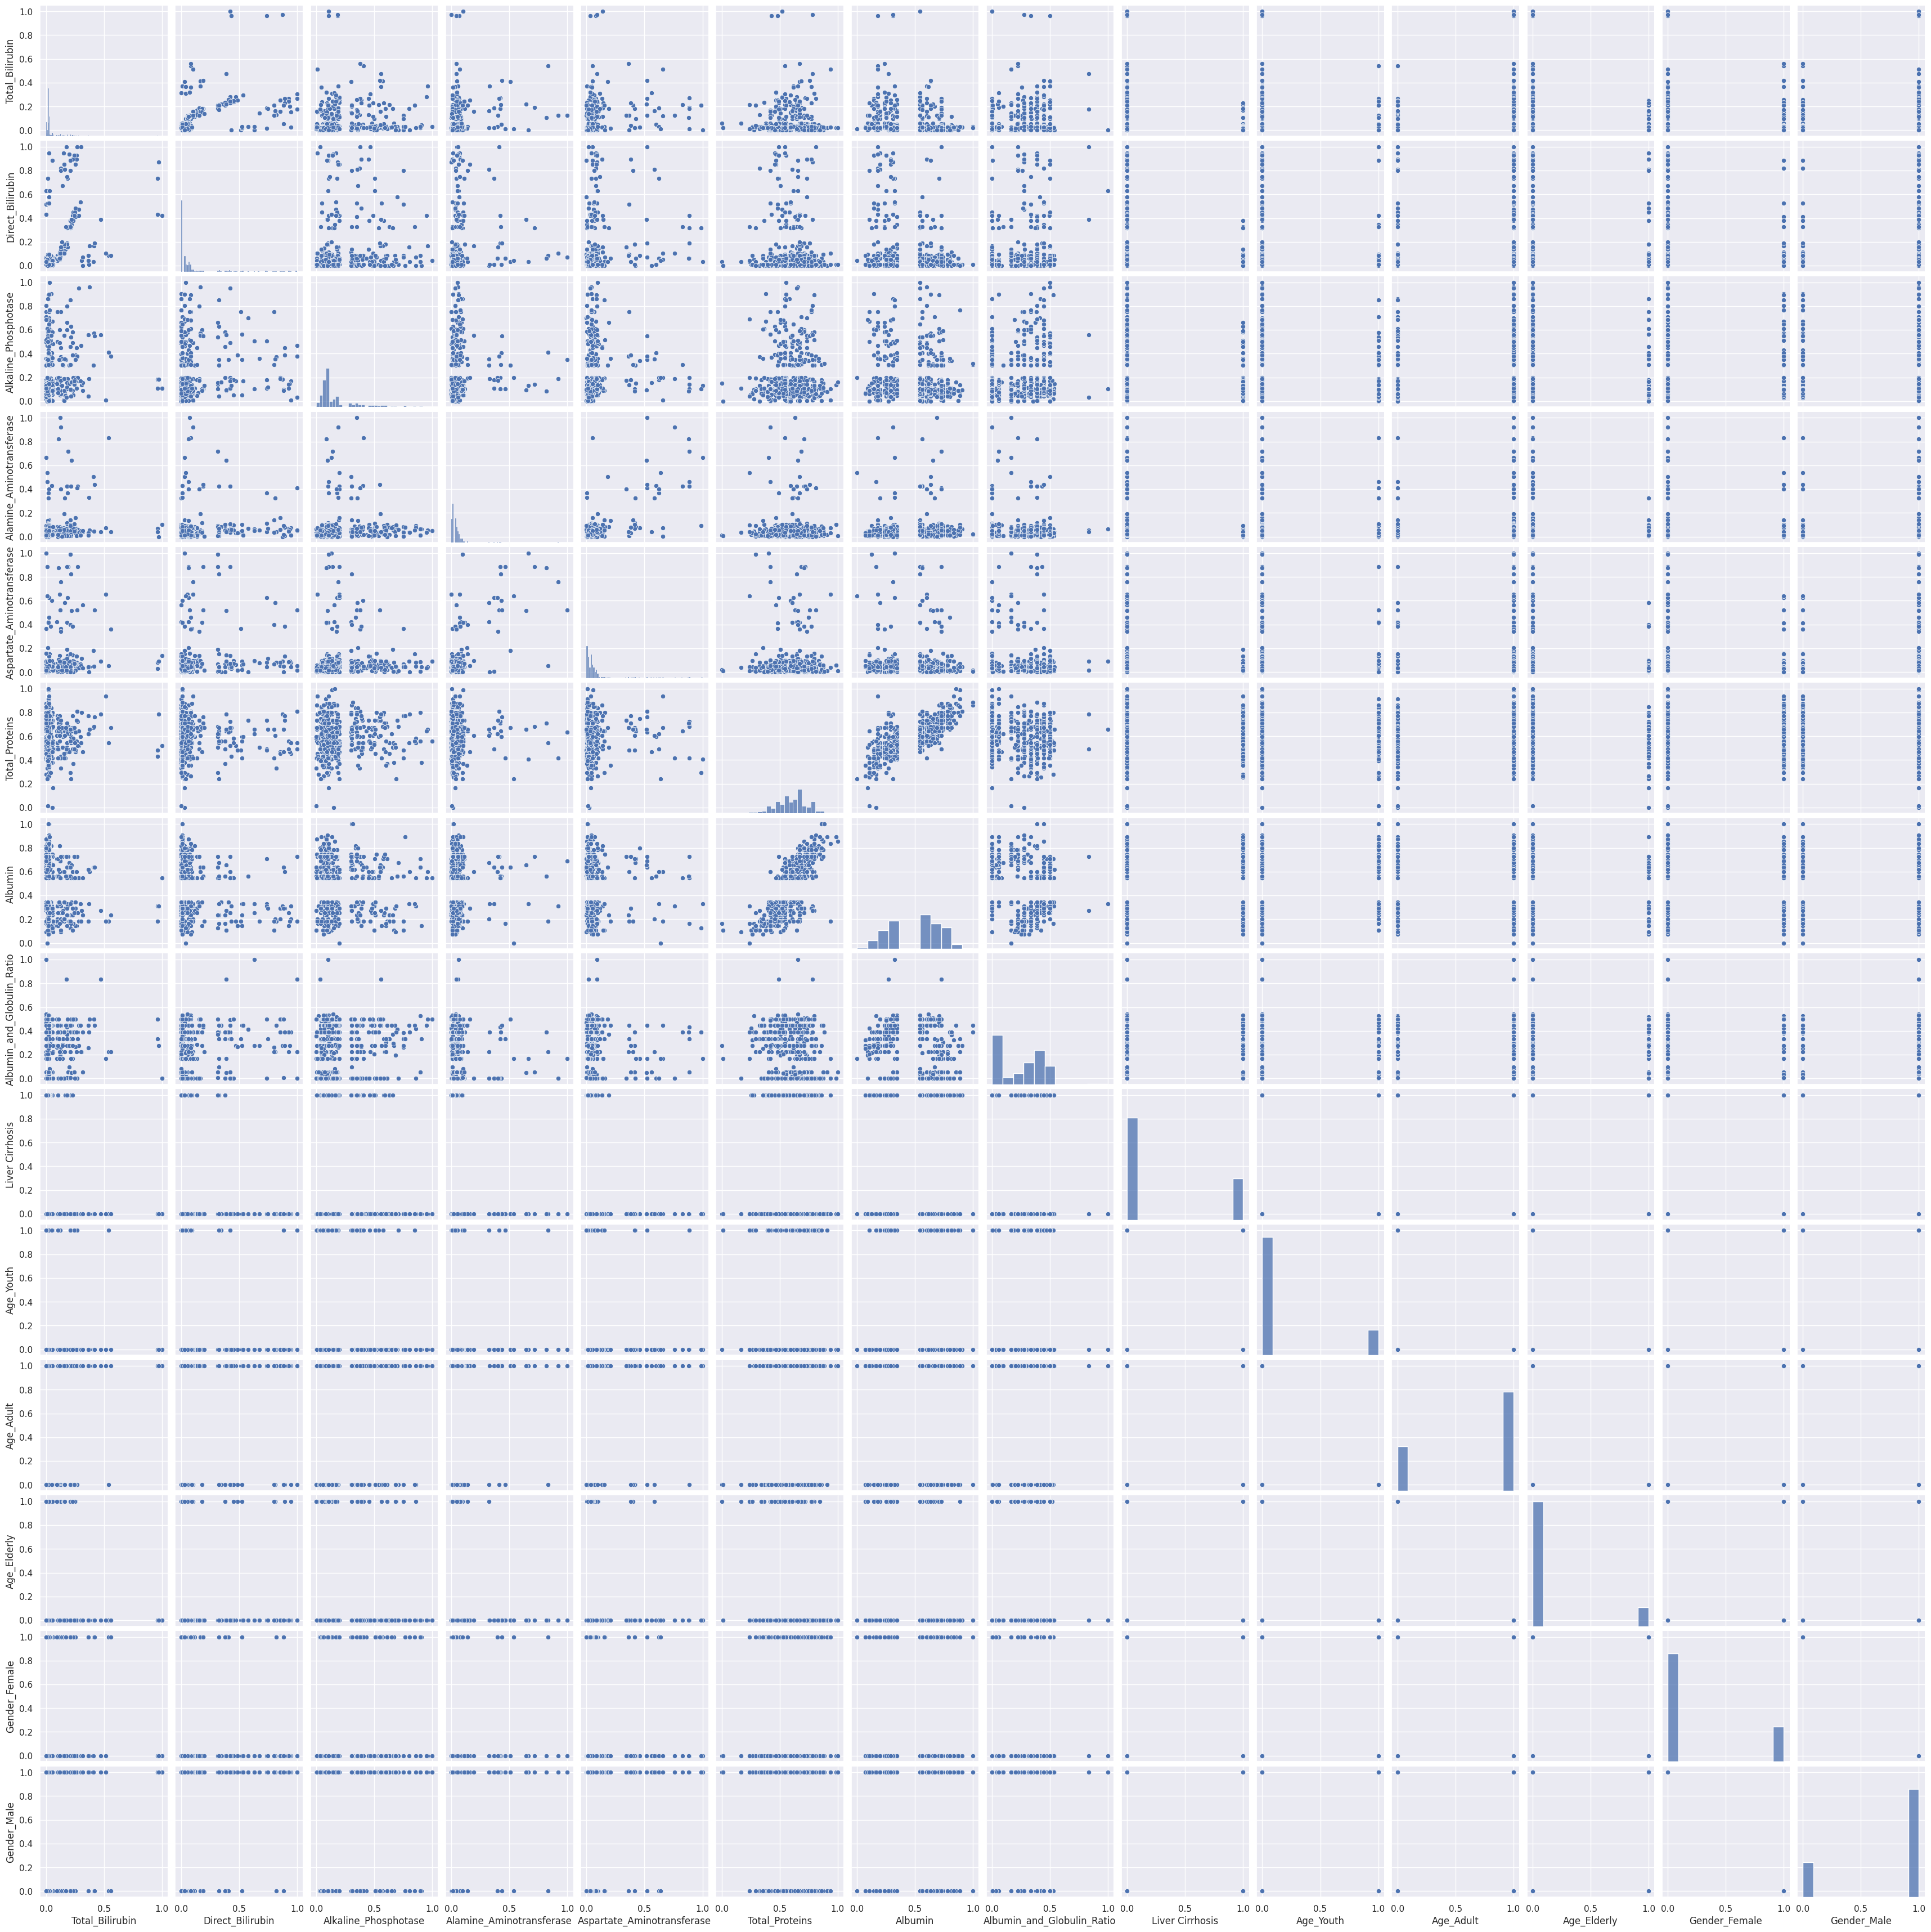

In [69]:
# creating dataframe pairplot
sns.pairplot(df1);

**Creating Final Dataset:**

In [70]:
# creating dataframe copy and assigning it to new dataframe variable to be used in machine learning section
liver_final = df1.copy()

In [71]:
# retrieving dataframe shape
liver_final.shape

(579, 14)

In [72]:
# retrieving dataframe information
liver_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total_Bilirubin             579 non-null    float64
 1   Direct_Bilirubin            579 non-null    float64
 2   Alkaline_Phosphotase        579 non-null    float64
 3   Alamine_Aminotransferase    579 non-null    float64
 4   Aspartate_Aminotransferase  579 non-null    float64
 5   Total_Proteins              579 non-null    float64
 6   Albumin                     579 non-null    float64
 7   Albumin_and_Globulin_Ratio  579 non-null    float64
 8   Liver Cirrhosis             579 non-null    int64  
 9   Age_Youth                   579 non-null    uint8  
 10  Age_Adult                   579 non-null    uint8  
 11  Age_Elderly                 579 non-null    uint8  
 12  Gender_Female               579 non-null    uint8  
 13  Gender_Male                 579 non

In [73]:
# retrieving dataframe description
liver_final.describe()

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver Cirrhosis,Age_Youth,Age_Adult,Age_Elderly,Gender_Female,Gender_Male
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,0.063630,0.093682,0.187371,0.056748,0.074505,0.602217,0.497441,0.246047,0.288428,0.176166,0.689119,0.131261,0.245250,0.754750
std,0.113745,0.193202,0.190072,0.113741,0.145454,0.139252,0.220919,0.195100,0.453423,0.381291,0.463254,0.337977,0.430608,0.430608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.018987,0.010526,0.075500,0.011579,0.014583,0.518987,0.290909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.025316,0.031579,0.105000,0.032632,0.039583,0.620253,0.545455,0.277778,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.041139,0.063158,0.192000,0.054737,0.062500,0.683544,0.690909,0.444444,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
# retrieving correlations of dataframe
liver_final.corr()

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver Cirrhosis,Age_Youth,Age_Adult,Age_Elderly,Gender_Female,Gender_Male
Total_Bilirubin,1.000000,0.528048,0.165819,0.230598,0.248941,-0.018870,-0.207174,0.105883,-0.209435,-0.097573,0.129389,-0.063680,-0.075923,0.075923
Direct_Bilirubin,0.528048,1.000000,0.195051,0.153895,0.217198,-0.061536,-0.230844,0.135944,-0.214807,-0.093889,0.076705,0.005749,-0.136766,0.136766
Alkaline_Phosphotase,0.165819,0.195051,1.000000,0.102949,0.082126,0.010902,-0.132402,0.173540,-0.204983,-0.064118,0.042910,-0.002942,-0.014178,0.014178
Alamine_Aminotransferase,0.230598,0.153895,0.102949,1.000000,0.725879,-0.030741,-0.028870,-0.058931,-0.169818,-0.015069,0.070710,-0.076281,-0.068018,0.068018
Aspartate_Aminotransferase,0.248941,0.217198,0.082126,0.725879,1.000000,-0.025111,-0.075280,-0.015966,-0.193430,-0.052173,0.087553,-0.059348,-0.100839,0.100839
Total_Proteins,-0.018870,-0.061536,0.010902,-0.030741,-0.025111,1.000000,0.762902,-0.185447,0.036056,0.088819,0.049743,-0.176223,0.090697,-0.090697
Albumin,-0.207174,-0.230844,-0.132402,-0.028870,-0.075280,0.762902,1.000000,-0.340095,0.150109,0.181252,-0.027459,-0.176230,0.094898,-0.094898
Albumin_and_Globulin_Ratio,0.105883,0.135944,0.173540,-0.058931,-0.015966,-0.185447,-0.340095,1.000000,-0.062167,-0.132362,0.087089,0.023917,0.032383,-0.032383
Liver Cirrhosis,-0.209435,-0.214807,-0.204983,-0.169818,-0.193430,0.036056,0.150109,-0.062167,1.000000,0.175930,-0.115996,-0.044262,0.080132,-0.080132
Age_Youth,-0.097573,-0.093889,-0.064118,-0.015069,-0.052173,0.088819,0.181252,-0.132362,0.175930,1.000000,-0.688480,-0.179748,0.041986,-0.041986


**Importing Machine Learning Modules:**

In [75]:
# importing machine learning libraries and modules
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor
from pprint import pprint
from sklearn.metrics import mean_squared_error, precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
import warnings
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from time import time
import scipy.stats as stats
import scipy.stats
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')

**Metrics Functions:**

In [76]:
# creating print_metrics function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

**Train Test Split:**

In [77]:
# creating train_test_split and retrieving shapes of each
X = liver_final.drop(['Liver Cirrhosis'], axis=1)
y = liver_final['Liver Cirrhosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train shape: {}'.format(X_train.shape))
print('X_test shape {}'.format(X_test.shape))
print('y_train shape {}'.format(y_train.shape))
print('y_test shape {}'.format(y_test.shape))

X_train shape: (405, 13)
X_test shape (174, 13)
y_train shape (405,)
y_test shape (174,)


**Support Vector Machine (SVM):**

In [78]:
# instantiating, fitting, and predicting using SVM algorithm model
svm_clf = svm.SVC(random_state=42)
svm_clf.fit(X_train, y_train)
svm_y_trials = svm_clf.predict(X_train)
svm_y_pred = svm_clf.predict(X_test)

In [79]:
# showing metrics for testing set
print('\033[1mSVM Test Metrics:\033[0m')
print_metrics(y_test, svm_y_pred)

SVM Test Metrics:
Precision Score: 0.5454545454545454
Recall Score: 0.10526315789473684
Accuracy Score: 0.6781609195402298
F1 Score: 0.1764705882352941


In [80]:
# showing confusion matrix of SVM algorithm
print('\033[1mSVM Confusion Matrix:\033[0m')
print(confusion_matrix(y_test, svm_y_pred))

SVM Confusion Matrix:
[[112   5]
 [ 51   6]]


In [81]:
# showing auc of SVM algorithm
print('\033[1mSVM AUC:\033[0m')
svm_false_positive_rate, svm_true_positive_rate, svm_thresholds = roc_curve(y_test, svm_y_pred)
svm_auc = auc(svm_false_positive_rate, svm_true_positive_rate)
svm_auc

SVM AUC:


0.5312640575798471

**K-Nearest Neighbors Algorithm:**

In [82]:
# instantiating, fitting, and predicting using KNN algorithm model
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_y_trials = knn_clf.predict(X_train)
knn_y_pred = knn_clf.predict(X_test)

In [83]:
# showing metrics for for test set
print('\033[1mKNN Test Metrics:\033[0m')
print_metrics(y_test, knn_y_pred)

KNN Test Metrics:
Precision Score: 0.4318181818181818
Recall Score: 0.3333333333333333
Accuracy Score: 0.6379310344827587
F1 Score: 0.3762376237623762


In [84]:
# showing confusion matrix of KNN algorithm
print('\033[1mKNN Confusion Matrix:\033[0m')
print(confusion_matrix(y_test, knn_y_pred))

KNN Confusion Matrix:
[[92 25]
 [38 19]]


In [85]:
# showing auc of KNN algorithm
print('\033[1mKNN AUC:\033[0m')
knn_false_positive_rate, knn_true_positive_rate, knn_thesholds = roc_curve(y_test, knn_y_pred)
knn_auc = auc(knn_false_positive_rate, knn_true_positive_rate)
knn_auc

KNN AUC:


0.5598290598290598

**Decision Tree Algorithm:**

In [86]:
# instantiating, fitting, and predicting using Decision Tree algorithm model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_y_trails = dt_clf.predict(X_train)
dt_y_pred = dt_clf.predict(X_test)

In [87]:
# showing metrics for test sets
print('\033[1mDecision Tree Test Metrics:\033[0m')
print_metrics(y_test, dt_y_pred)

Decision Tree Test Metrics:
Precision Score: 0.34782608695652173
Recall Score: 0.2807017543859649
Accuracy Score: 0.5919540229885057
F1 Score: 0.3106796116504854


In [88]:
# showing confusion matrix of Decision Tree algorithm
print('\033[1mDecision Tree Confusion Matrix:\033[0m')
print(confusion_matrix(y_test, dt_y_pred))

Decision Tree Confusion Matrix:
[[87 30]
 [41 16]]


In [89]:
# showing auc of Decision Tree algorithm
print('\033[1mDecision Tree AUC:\033[0m')
dt_false_positive_rate, dt_true_positive_rate, dt_thesholds = roc_curve(y_test, dt_y_pred)
dt_auc = auc(dt_false_positive_rate, dt_true_positive_rate)
dt_auc

Decision Tree AUC:


0.5121457489878543

**Random Forest Algorithm:**

In [90]:
# instantiating, fitting, and predicting using Random Forest algorithm model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_y_trials = rf_clf.predict(X_train)
rf_y_pred = rf_clf.predict(X_test)

In [91]:
# showing metrics for test set
print('\033[1mRandom Forest Test Metrics:\033[0m')
print_metrics(y_test, rf_y_pred)

Random Forest Test Metrics:
Precision Score: 0.47368421052631576
Recall Score: 0.15789473684210525
Accuracy Score: 0.6666666666666666
F1 Score: 0.23684210526315788


In [92]:
# showing confusion matrix of Random Forest algorithm
print('033[1mRandom Forest Confusion Matrix:033[0m')
print(confusion_matrix(y_test, rf_y_pred))

033Random Forest Confusion Matrix:033
[[107  10]
 [ 48   9]]


In [93]:
# showing auc of Random Forest algorithm
print('\033[1mRandom Forest AUC:\033[0m')
rf_false_positive_rate, rf_true_positive_rate, rf_thesholds = roc_curve(y_test, rf_y_pred)
rf_auc = auc(rf_false_positive_rate, rf_true_positive_rate)
rf_auc

Random Forest AUC:


0.5362123256860098

**Gradient Boosting Machines Algorithm (GBM):**

In [94]:
# instantiating, fitting, and predicting using Gradient Boosting algorithm model
gbm_clf = GradientBoostingClassifier(random_state=42)
gbm_clf.fit(X_train, y_train)
gbm_y_trials = gbm_clf.predict(X_train)
gbm_y_pred = gbm_clf.predict(X_test)

In [95]:
# showing metrics for test sets
print('\033[1mGBM Forest Test Metrics:\033[0m')
print_metrics(y_test, gbm_y_pred)

GBM Forest Test Metrics:
Precision Score: 0.42857142857142855
Recall Score: 0.21052631578947367
Accuracy Score: 0.6494252873563219
F1 Score: 0.2823529411764706


In [96]:
# showing confusion matrix of GBM algorithm
print('\033[1mGBM Confusion Matrix:\033[0m')
print(confusion_matrix(y_test, gbm_y_pred))

GBM Confusion Matrix:
[[101  16]
 [ 45  12]]


In [97]:
# showing auc of Gradient Boosting algorithm
print('\033[1mGBM AUC:\033[0m')
gbm_false_positive_rate, gbm_true_positive_rate, gbm_thesholds = roc_curve(y_test, gbm_y_pred)
gbm_auc = auc(gbm_false_positive_rate, gbm_true_positive_rate)
gbm_auc

GBM AUC:


0.5368870895186685

**eXtreme Gradient Boosting Algorithm (XGBoost):**

In [98]:
# instantiatinng, fitting, and predicting using eXtreme Gradient Boosting algorithm model
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_y_trials = xgb_clf.predict(X_train)
xgb_y_pred = xgb_clf.predict(X_test)

In [99]:
# showing metrics for test sets
print('\033[1mXGBoost Test Metrics:\033[0m')
print_metrics(y_test, xgb_y_pred)

XGBoost Test Metrics:
Precision Score: 0.5142857142857142
Recall Score: 0.3157894736842105
Accuracy Score: 0.6781609195402298
F1 Score: 0.391304347826087


In [100]:
# showing confusion matrix of XGBoost algorithm
print('\033[1mXGBoost Confusion Matrix:\033[0m')
print('\n')
print(confusion_matrix(y_test, xgb_y_pred))

XGBoost Confusion Matrix:


[[100  17]
 [ 39  18]]


In [101]:
# showing auc of eXtreme Gradint Boosting algorithm
print('\033[1mXGBoost AUC:\033[0m')
xgb_false_positive_rate, xgb_true_positive_rate, xgb_thesholds = roc_curve(y_test, xgb_y_pred)
xgb_auc = auc(xgb_false_positive_rate, xgb_true_positive_rate)
xgb_auc

XGBoost AUC:


0.5852451641925326

**AdaBoost Algorithm:**

In [102]:
# instantiating, fitting, and predicting using AdaBoost algorithm model
adb_clf = AdaBoostClassifier(random_state=42)
adb_clf.fit(X_train, y_train)
adb_y_trials = adb_clf.predict(X_train)
adb_y_pred = adb_clf.predict(X_test)

In [103]:
# showing metrics for test sets
print('\033[1mAdaBoost Test Metrics:\033[0m')
print_metrics(y_test, adb_y_pred)

AdaBoost Test Metrics:
Precision Score: 0.525
Recall Score: 0.3684210526315789
Accuracy Score: 0.6839080459770115
F1 Score: 0.4329896907216495


In [104]:
# showing confusion matrix of Adaboost algorithm
print('\033[1mAdaboost Confusion Matrix:\033[0m')
print(confusion_matrix(y_test, adb_y_pred))

Adaboost Confusion Matrix:
[[98 19]
 [36 21]]


In [105]:
# showing auc of AdaBoost algorithm
print('\033[1mAdaBoost AUC:\033[0m')
adb_false_positive_rate, adb_true_positive_rate, adb_thesholds = roc_curve(y_test, adb_y_pred)
adb_auc = auc(adb_false_positive_rate, adb_true_positive_rate)
adb_auc

AdaBoost AUC:


0.6030139451192084

**ROC/AUC Curve Visualization Of All Algorithms:**

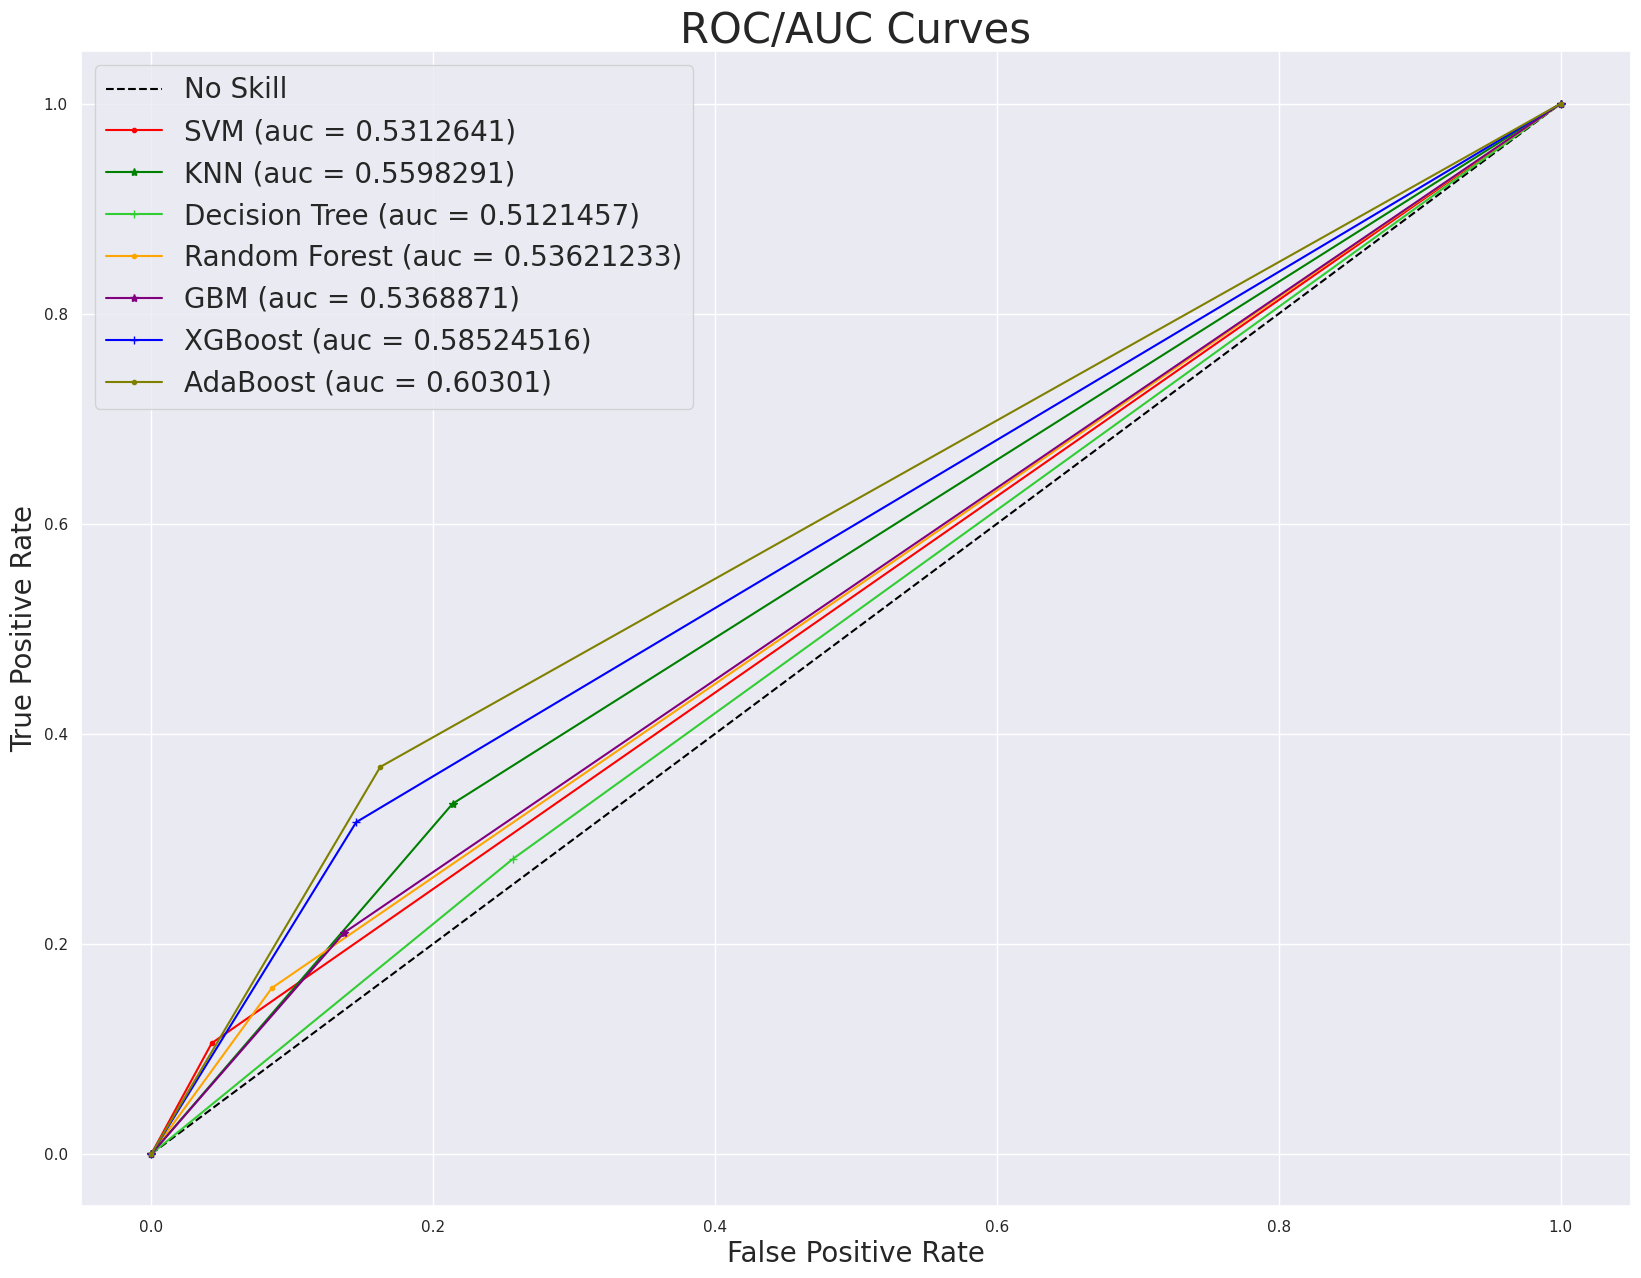

In [106]:
# creating no skill line
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

plt.figure(figsize=(20,15))
plt.title('ROC/AUC Curves',fontsize=30)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, color='black', linestyle='--', label='No Skill')
plt.plot(svm_false_positive_rate, svm_true_positive_rate, color='red', linestyle='-', marker='.', label='SVM (auc = %0.7f)' % svm_auc)
plt.plot(knn_false_positive_rate, knn_true_positive_rate, color='green', linestyle='-', marker='*', label='KNN (auc = %0.7f)' % knn_auc)
plt.plot(dt_false_positive_rate, dt_true_positive_rate, color='limegreen', linestyle='-', marker='+', label='Decision Tree (auc = %0.7f)' % dt_auc)
plt.plot(rf_false_positive_rate, rf_true_positive_rate, color='orange', linestyle='-', marker='.', label='Random Forest (auc = %0.8f)' % rf_auc)
plt.plot(gbm_false_positive_rate, gbm_true_positive_rate, color='purple', linestyle='-', marker='*', label='GBM (auc = %0.7f)' % gbm_auc)
plt.plot(xgb_false_positive_rate, xgb_true_positive_rate, color='blue', linestyle='-', marker='+', label='XGBoost (auc = %0.8f)' % xgb_auc)
plt.plot(adb_false_positive_rate, adb_true_positive_rate, color='olive', linestyle='-', marker='.', label='AdaBoost (auc = %0.5f)' % adb_auc)

# axis labels
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

# show the legend
plt.legend(prop={'size': 20})


# show the plot
plt.show()